<h1 style="text-align: center">Support Vector Machine</h1>

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from scipy.spatial.distance import cdist

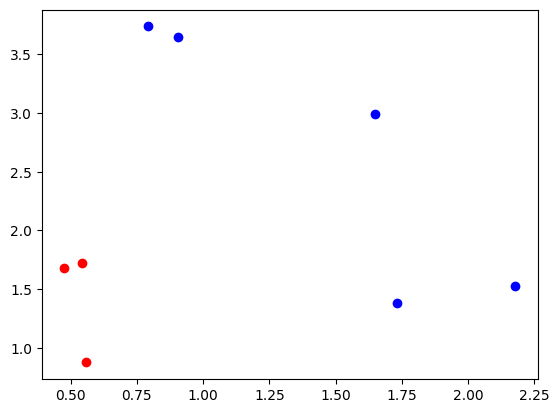

In [6]:
X1 = np.random.multivariate_normal([1,1], [[1, 0], [0, 1]], size = 3)
X2 = np.random.multivariate_normal([2,2], [[1, 0], [0, 1]], size = 5)

plt.scatter(X2[:, 0], X2[:, 1], c = "blue")
plt.scatter(X1[:, 0], X1[:, 1], c = "red")

In [9]:
!pip install -U scikit-learn

     ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
      --------------------------------------- 0.1/9.3 MB 1.4 MB/s eta 0:00:07
     - -------------------------------------- 0.2/9.3 MB 1.8 MB/s eta 0:00:06
     - -------------------------------------- 0.3/9.3 MB 1.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/9.3 MB 2.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/9.3 MB 2.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/9.3 MB 2.2 MB/s eta 0:00:04
     --- ------------------------------------ 0.9/9.3 MB 2.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.1/9.3 MB 2.7 MB/s eta 0:00:04
     ----- ---------------------------------- 1.3/9.3 MB 2.8 MB/s eta 0:00:03
     ------ --------------------------------- 1.5/9.3 MB 3.1 MB/s eta 0:00:03
     ------- -------------------------------- 1.7/9.3 MB 3.2 MB/s eta 0:00:03


In [10]:
!pip install seaborn
!pip install opencv-python

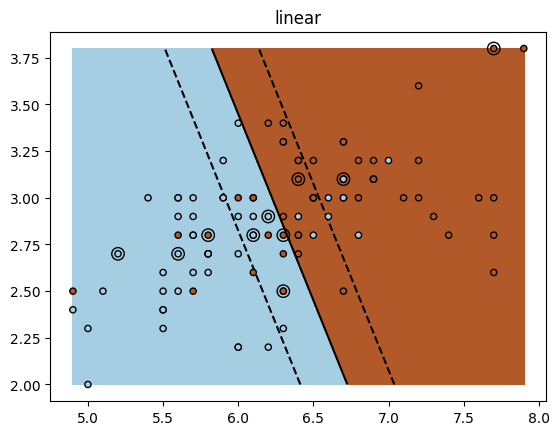

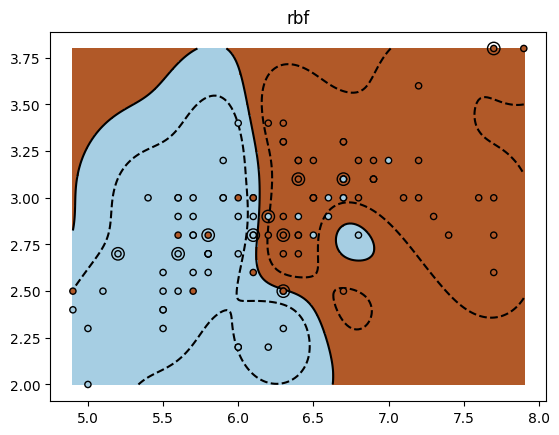

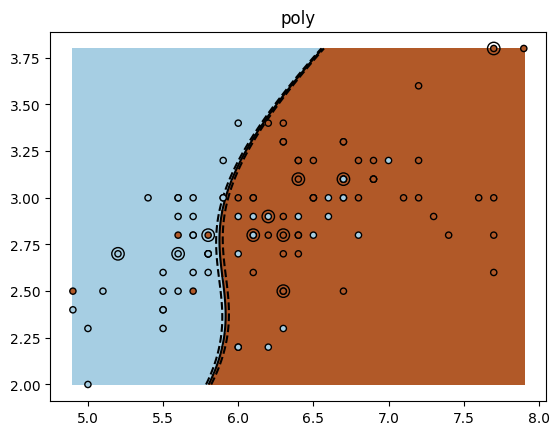

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

In [14]:
np.random.multivariate_normal([1,1], [[1,0], [0, 1]], 5).shape

(5, 2)

In [17]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 

In [29]:
X0.T

array([[2.18060433, 2.11846087, 3.0920616 , 2.29956564, 1.49267276,
        1.79899274, 1.21951791, 2.32584911, 1.81367524, 1.67240423],
       [1.96421193, 2.66133611, 3.03045041, 2.11775698, 1.44637609,
        2.05919044, 1.42594145, 2.32586616, 1.29657045, 1.93037837]])

In [35]:
X = np.concatenate((X0, X1), axis = 0).T
y = np.concatenate((np.ones(N), -1 * np.ones(N)), axis = 0)

In [37]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [38]:
X

array([[2.18060433, 2.11846087, 3.0920616 , 2.29956564, 1.49267276,
        1.79899274, 1.21951791, 2.32584911, 1.81367524, 1.67240423,
        3.85511216, 4.48086007, 4.14330184, 3.77487137, 4.23379466,
        4.16391014, 3.10502215, 3.63784508, 3.04656172, 3.06207882],
       [1.96421193, 2.66133611, 3.03045041, 2.11775698, 1.44637609,
        2.05919044, 1.42594145, 2.32586616, 1.29657045, 1.93037837,
        2.08488775, 2.17631696, 1.5019285 , 1.75338525, 2.34684366,
        1.85502728, 2.0952162 , 1.9232835 , 0.9375969 , 1.40408552]])

In [41]:
V = np.concatenate((X0.T, -X1.T), axis = 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [9]:
iris_data = datasets.load_iris()

In [91]:
X = iris_data.data[:, [0, 2]]
y = iris_data.target
X[y == 1]

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1]])

In [92]:
feature_names = iris_data.feature_names
target_names = iris_data.target_names

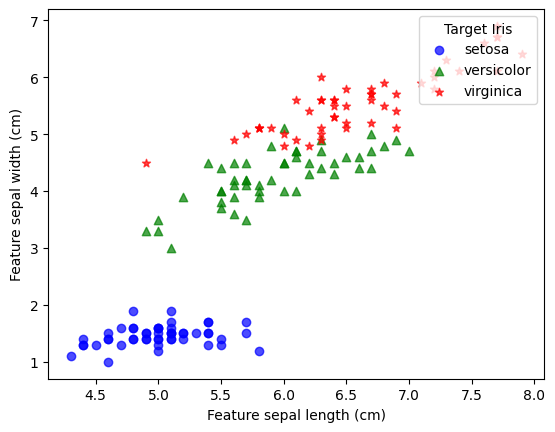

In [93]:
len_labels = len(target_names)

for i, c, m in zip(range(len_labels), ["b", "g", "r"], ["o", "^", "*"]):
    plt.scatter(X[y == i, 0], X[y == i, 1], c = c, marker = m, alpha = .7)
plt.legend(target_names, loc = "upper right", scatterpoints = 1, title="Target Iris")
plt.xlabel("Feature " + feature_names[0])
plt.ylabel("Feature " + feature_names[1]);

In [94]:
clf = svm.SVC(C = 100)
clf.fit(X, y)

SVC(C=100)

In [95]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [96]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(
    XX,
    YY,
    Z,
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
    levels=[-0.5, 0, 0.5],
)

ValueError: cannot reshape array of size 120000 into shape (200,200)

In [97]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [103]:
clf = svm.SVC(kernel = 'linear', C = 100, random_state = 123)
clf.fit(X, y)

SVC(C=100, kernel='linear', random_state=123)

In [106]:
def visualize_svm(X, y, clf, title = None):
    X_max = X[:, 0].max() + 1
    X_min = X[:, 0].min() - 1
    Y_max = X[:, 1].max() + 1
    Y_min = X[:, 1].min() - 1
    
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.01), np.arange(Y_min, Y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
#     plt.clf()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    
    if title is not None:
        plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    
    

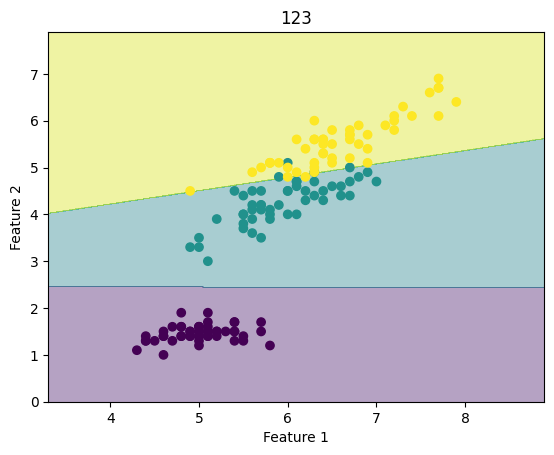

In [108]:
visualize_svm(X, y, clf, title = "123")

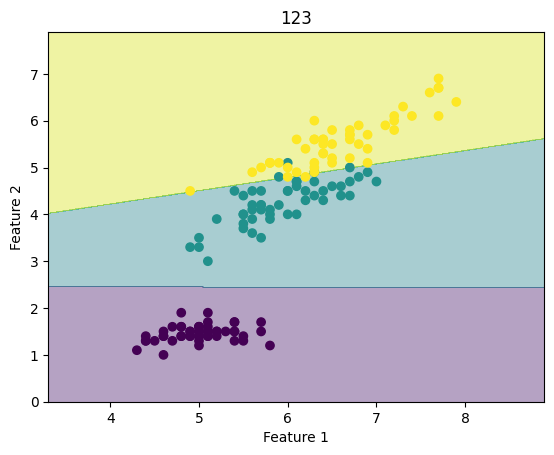

In [107]:
visualize_svm(X, y, clf, title = "123")

In [115]:
clf.support_vectors_

array([[4.8, 1.9],
       [5.1, 1.9],
       [6.1, 4.7],
       [5.9, 4.8],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.7, 5. ],
       [6. , 5.1],
       [5.4, 4.5],
       [5.1, 3. ],
       [4.9, 4.5],
       [6.3, 4.9],
       [6.2, 4.8],
       [6.1, 4.9],
       [6. , 4.8],
       [6.9, 5.1],
       [6.3, 5. ]])

In [117]:
X[24]

array([4.8, 1.9])

In [116]:
clf.support_

array([ 24,  44,  63,  70,  72,  73,  77,  83,  84,  98, 106, 123, 126,
       127, 138, 141, 146])

In [112]:
clf.n_support_

array([2, 8, 7])

In [119]:
a = np.array([1,2,3])
np.concatenate((a, [3]), axis = 0)

array([1, 2, 3, 3])

(3,)

In [212]:
class SVM_:
    def __init__(self, learning_rate = 0.01, lambda_ = 0.01, n_iterations = 1000):
        self.lr = learning_rate
        self.lambda_ = lambda_
        self.iterations = n_iterations
        self.weight = None
        self.bias = None
        
    def should_stop(self, ite):
        return ite == self.iterations
    
    def fit(self, X, y):
        n_samples, n_feature = X.shape
        
        # Initialize Params
        self.weight = np.random.normal(0, 1, n_feature)
        self.bias = np.random.normal(0, 1, 1)
        y_idx = np.where(y <= 0, -1, 1)
        ite = 1
        old_weight = None
        old_bias = None
        
        while not self.should_stop(ite):
            ite += 1
            old_weight = self.weight
            old_bias = self.bias
            
            for idx, data in enumerate(X):
                condition = y_idx[idx] * (self.weight.T @ data + self.bias) > 1
                if condition:
                    self.weight -= self.lr * self.lambda_ * self.weight
                else:
                    self.weight -= self.lr * (self.lambda_ * self.weight - y_idx[idx] * data)
                    self.bias += self.lr * y_idx[idx]
            
        
    
    def predict(self, data):
        return self.weight.T @ data + self.bias

In [213]:
svm = SVM_()

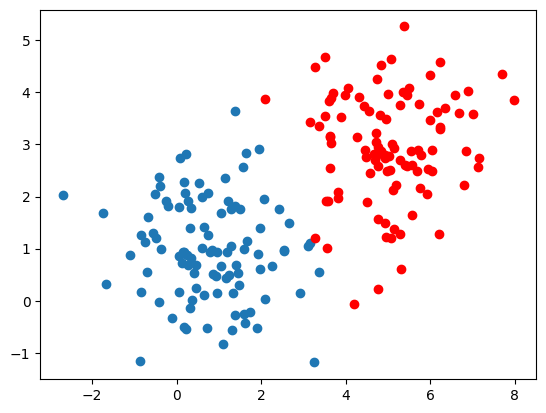

In [214]:
center = [[1,1], [5,3]]
std = [[1, 0], [0, 1]]

X = np.random.multivariate_normal(center[0], std, 100)
plt.scatter(X[:, 0], X[:, 1])
Y = np.random.multivariate_normal(center[1], std, 100)
plt.scatter(Y[:, 0], Y[:, 1], c = 'r')


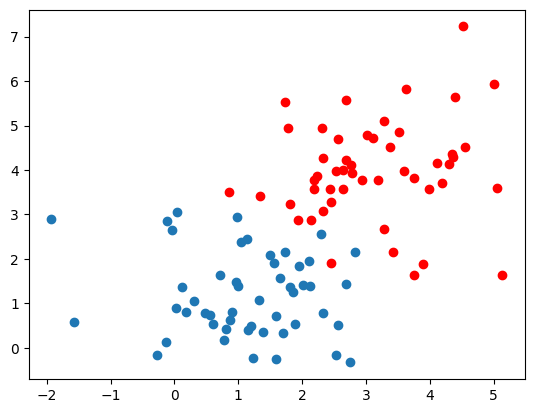

In [215]:
center = [[1,1], [3,4]]
cov = [[1, 0], [0, 1]]
n_samples = 50

X1 = np.random.multivariate_normal(center[0], cov, n_samples)
X2 = np.random.multivariate_normal(center[1], cov, n_samples)
X = np.concatenate((X1, X2), axis = 0)

y = np.concatenate((np.ones(n_samples), - np.ones(n_samples)), axis = 0)
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1], c = 'r')

In [216]:
idx = np.random.permutation(2 * n_samples)
X, y = X[idx], y[idx]

In [217]:
svm.fit(X, y)

In [218]:
svm.weight

array([-1.19935443, -1.73065676])

In [219]:
svm.bias

array([6.79305519])

In [220]:
X, y

(array([[ 0.01970422,  0.90042187],
        [ 2.63464629,  3.56647853],
        [ 0.86234172,  0.62247873],
        [-0.12391219,  2.85546719],
        [ 4.99748293,  5.93289434],
        [-1.93066338,  2.90324692],
        [ 2.52985435, -0.17016962],
        [ 0.47925724,  0.77404394],
        [ 0.80477771,  0.42980079],
        [ 3.27700099,  5.09815211],
        [ 1.14639421,  0.40075097],
        [ 3.5094555 ,  4.85391957],
        [ 1.20147275,  0.49443727],
        [ 2.1052453 ,  1.96422594],
        [ 2.68640013,  1.44148535],
        [ 2.55681385,  0.52146356],
        [ 0.17845552,  0.81013819],
        [ 1.85832323,  1.24737745],
        [-0.1375649 ,  0.13068613],
        [ 1.81372184,  3.23526426],
        [ 3.41903867,  2.15881082],
        [-0.27326164, -0.16215953],
        [ 2.11870584,  1.38616582],
        [ 1.58885304, -0.24222721],
        [ 0.85030809,  3.51606411],
        [ 4.52204977,  7.22889036],
        [ 2.45685946,  1.91488505],
        [ 2.45342245,  3.290

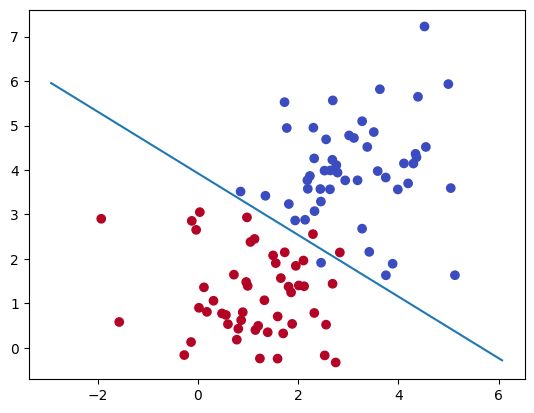

In [223]:
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# np.meshgrid(np.arange(X_min, X_max, 0.01), np.arange(Y_min, Y_max))
xx = np.arange(X_min, X_max, .1)
yy = - (svm.bias + svm.weight[0] * xx) / svm.weight[1]
plt.plot(xx, yy)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm);

In [209]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = svm.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1088 is different from 2)